In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('SensorData_Nov3.xlsx')
time = df['timeTracker'] - df['timeTracker'][0]
df.head()

,Unnamed: 0,Sensor 1,Sensor 2,Sensor 3,Sensor 4,d_Sensor 1,d_Sensor 2,d_Sensor 3,d_Sensor 4,timeTracker
0,0,0.464242,0.459394,0.498182,0.503030,0.000000,0.000000,0.000000,0.000000,1.572815e+09
1,1,0.466667,0.459394,0.498182,0.495758,0.117792,0.000000,0.000000,-0.353375,1.572815e+09
2,2,0.459370,0.451313,0.491717,0.493310,-0.185121,-0.244557,-0.195645,-0.291111,1.572815e+09
3,3,0.456907,0.448434,0.487208,0.488406,-0.211341,-0.261342,-0.287388,-0.361966,1.572815e+09
4,4,0.455432,0.448692,0.482497,0.485438,-0.193646,-0.179051,-0.352737,-0.346580,1.572815e+09


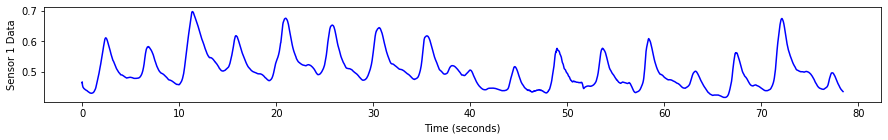

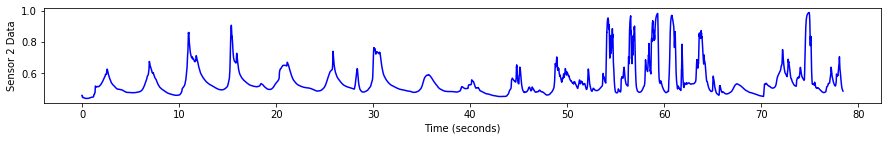

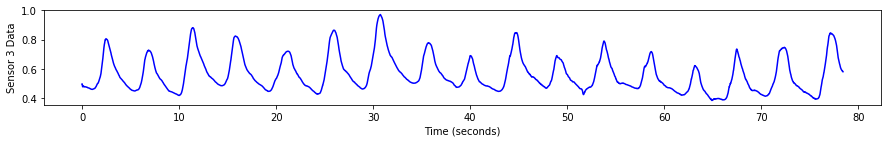

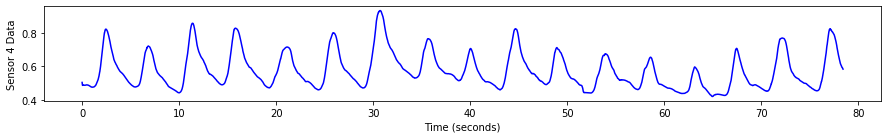

In [15]:
fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,1)
plt.plot(time, df['Sensor 1'], 'b')
plt.xlabel('Time (seconds)')
plt.ylabel('Sensor 1 Data')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,2)
plt.plot(time, df['Sensor 2'], 'b')
plt.xlabel('Time (seconds)')
plt.ylabel('Sensor 2 Data')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,3)
plt.plot(time, df['Sensor 3'], 'b')
plt.xlabel('Time (seconds)')
plt.ylabel('Sensor 3 Data')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,4)
plt.plot(time, df['Sensor 4'], 'b')
plt.xlabel('Time (seconds)')
plt.ylabel('Sensor 4 Data')
plt.show()

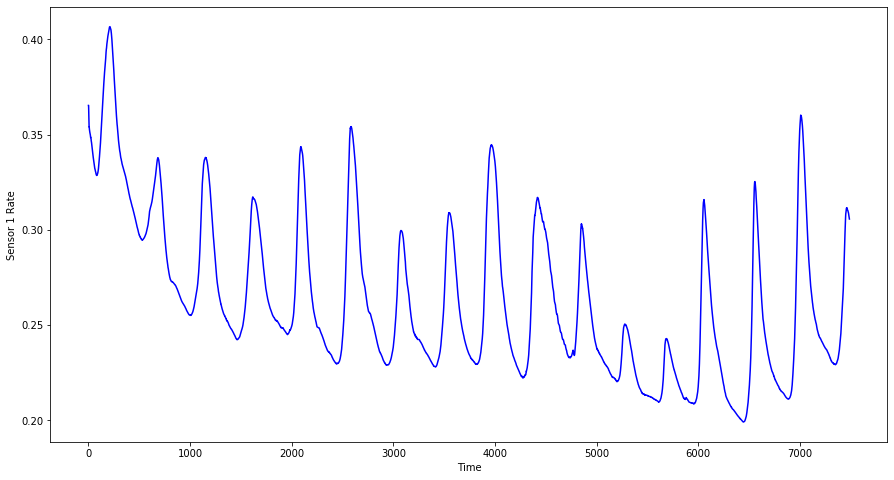

In [9]:
fig = plt.figure(figsize = (15, 8))
plt.plot(df['Sensor 1'], 'b')
plt.xlabel('Time')
plt.ylabel('Sensor 1 Rate')
plt.show()